### Exploratory Data Analysis of Global Terrorism Database | Kaggle

* https://www.kaggle.com/datasets/START-UMD/gtd?resource=download

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# read the data 
Terror = pd.read_csv('Data/globalterrorismdb_0718dist.csv', on_bad_lines = 'skip', encoding = 'latin')
pd.set_option("display.max.columns",500)

C:\Users\Michael Pannwitz\AppData\Local\Temp\ipykernel_136636\1854925680.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Terror = pd.read_csv('Data/globalterrorismdb_0718dist.csv', on_bad_lines = 'skip', encoding = 'latin')


In [3]:
#shape
Terror.shape

(181691, 135)

In [4]:
#the data 
Terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

##### Extracting columns 

In [5]:
#list
cols = ['iyear','imonth','iday','country_txt','city','latitude',
        'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
        'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail']

In [6]:
#create a DF
Terror_clean = pd.DataFrame(data = Terror, columns = cols)

In [7]:
#shape 
Terror_clean.shape

(181691, 21)

#### Null Values

In [8]:
Terror_clean.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   435
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                638
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

In [9]:
#head
Terror_clean.head(2)

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN


##### lets change the name of some columns 

In [10]:

Terror_clean.rename(columns={'iyear':'year',
                            'imonth':'month',
                            'iday':'day',
                            'country_txt':'country name',
                            'attacktype1_txt':'attacktype',
                            'targtype1_txt':'targtype',
                            'targsubtype1_txt':'targsubtype1',
                            'gname':'groupname',
                            'weaptype1_txt':'weaptype',
                            'dbsource':'source',
                            'region_txt':'region1',
                            'nkill':'killed',
                            'nwound':'wounded',
                            'natlty1_txt':'nationality',
                            'weapdetail':'weapon_detail'}, inplace = True)

In [11]:
pd.set_option("display.max.columns",500)

In [12]:
Terror_clean.head()

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1,target1,groupname,motive,weaptype,source,region1,killed,wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary


##### extract the features of the data set, so we can perform the EDA analysis


In [13]:
#add a new series /column named casualities to the Terror_clean DF 
Terror_clean['casualities'] = Terror_clean['wounded'] + Terror_clean['killed']

In [14]:
#check the new created column in the Terror_clean Df
Terror_clean.head()
#yes! column casualities created 

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1,target1,groupname,motive,weaptype,source,region1,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0
3,1970,1,0,Greece,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,PGIS,Western Europe,NaN,NaN,United States,Explosive,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,PGIS,East Asia,NaN,NaN,United States,Incendiary,NaN


In [78]:
#create a new DF named nationality_top
nationality_top = Terror_clean[Terror_clean['nationality'] != 'Unknown']
#create a new DF named nationality_type +count nationality column
nationality_type = nationality_top ['nationality'].value_counts().reset_index()
#renames the national columns of nationality underscore type type data frame for more descriptive names 
nationality_type.rename(columns = {"index":'Nationality', 'nationality':'Counts'}, inplace=True)
nationality_type

,Counts,count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [53]:
# unique values / nationality / Terror_clean Df
Terror_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [55]:
# unknow values 
terr = Terror_clean[Terror_clean['groupname'] != 'Unknown']
#count the values
Terror_Group_Org = terr['groupname'].value_counts().reset_index()
#renames the col
Terror_Group_Org.rename(columns = {"index":'Group_name','group_name':'Counts'}, inplace = True)
Terror_Group_Org

,groupname,count
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [20]:
Terror_clean.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1,target1,groupname,motive,weaptype,source,region1,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [21]:
#cities = values in the city column is not unknown
city1 = Terror_clean[Terror_clean['city'] != 'Unknown']

In [32]:
city_cln = city1['city'].value_counts().reset_index()
city_cln.rename(columns={"index":"City_name","city_name":"Counts"}, inplace = True)
city_cln

,city,count
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36667,Hotwag,1
36668,Ostend,1
36669,Balughata,1
36670,Jikoyi,1


In [56]:
#weapon type
wp = Terror_clean[Terror_clean['weaptype'] != 'Unknown']
weaptype_cln = wp['weaptype'].value_counts().reset_index()
weaptype_cln.rename(columns={"index":"weapon_type", "weapontype":"Counts"}, inplace = True)
weaptype_cln

,weaptype,count
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


### EDA of Terrorism

In [73]:
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1,target1,groupname,motive,weaptype,source,region1,killed,wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0


ValueError: Could not interpret input 'nationality'

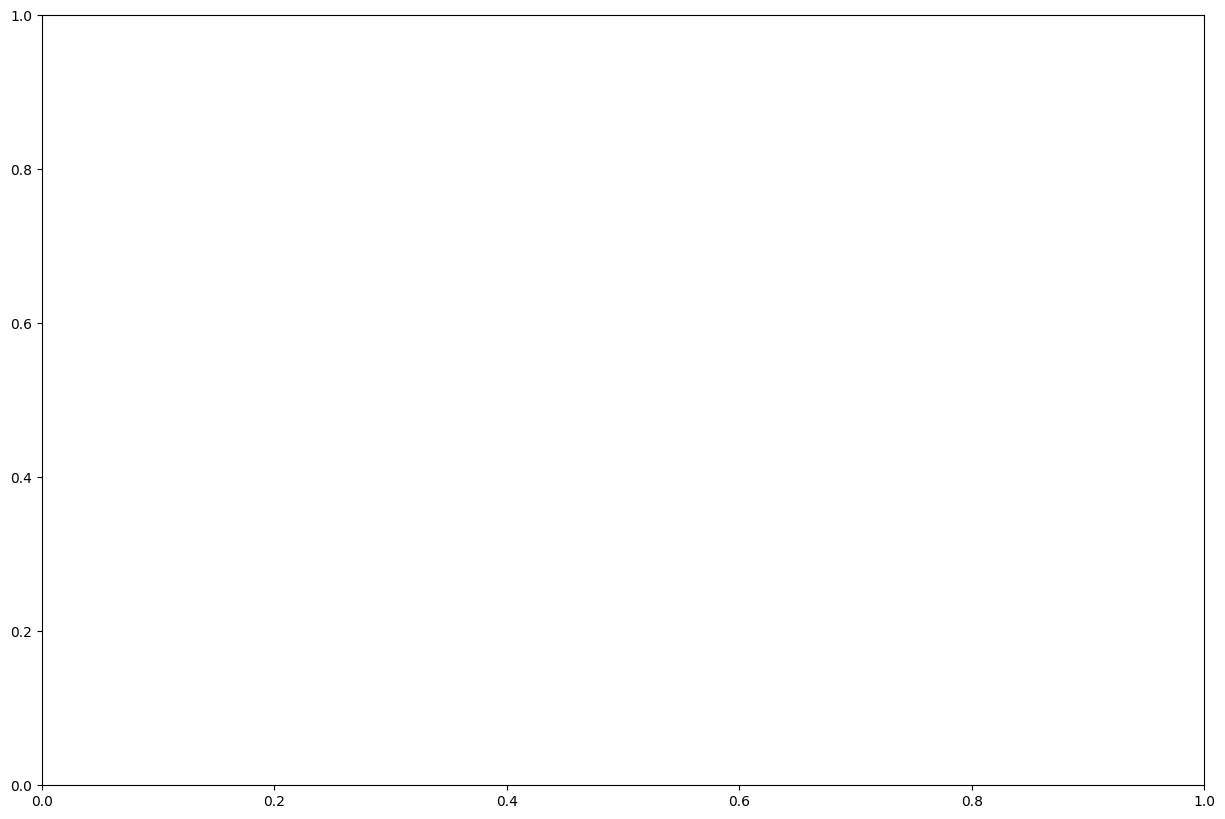

In [79]:
#Nationality
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = "Counts", y="nationality", data = nationality_type[0:10],
                palette = 'viridis').set_title('Nations Suffered Most of The Target Attacks')

ValueError: Could not interpret input 'weaptype'

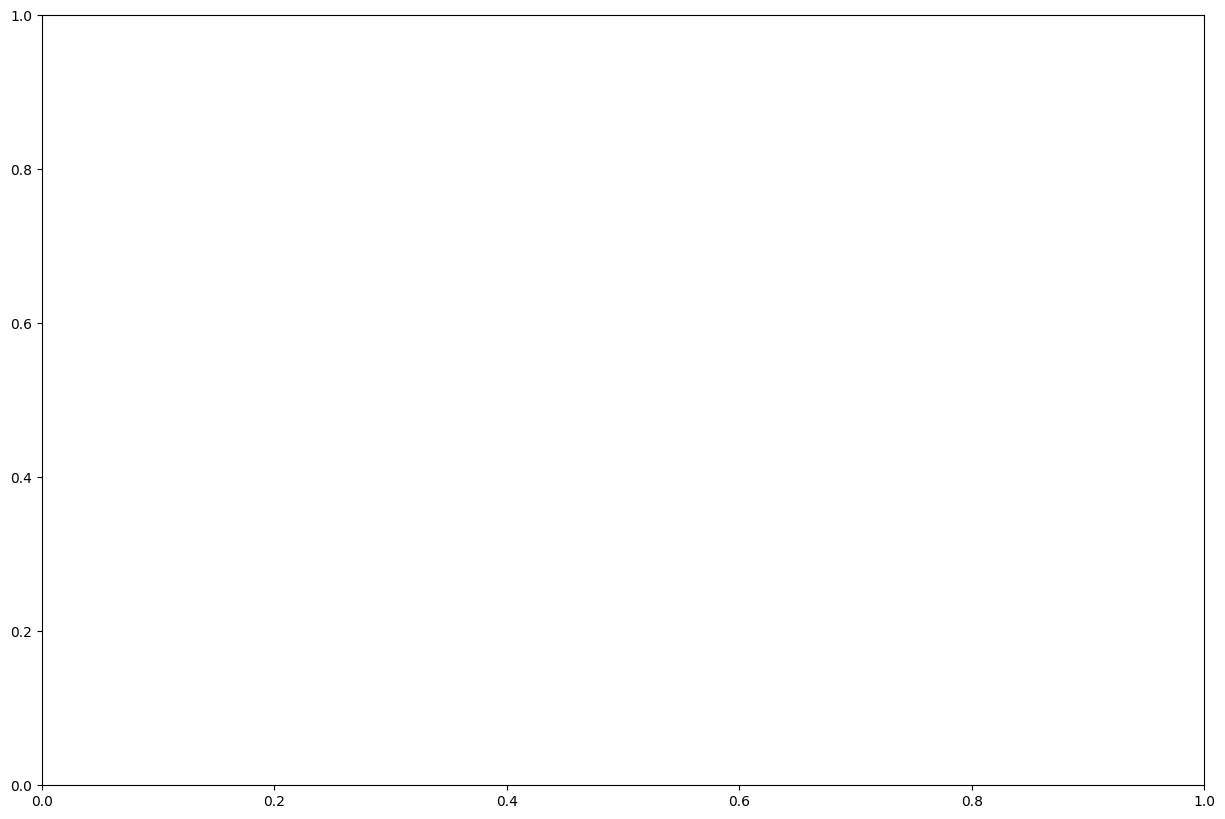

In [80]:
#Nationality
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = "Counts", y="weaptype", data = nationality_type[0:10],
                palette = 'viridis').set_title('Nations Suffered Most of The Target Attacks')